In [ ]:
# upload data file to the colab directory
from google.colab.files import upload
file = upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix


In [ ]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-22-06b5e1572af9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["DEATH_EVENT"] , palette = cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

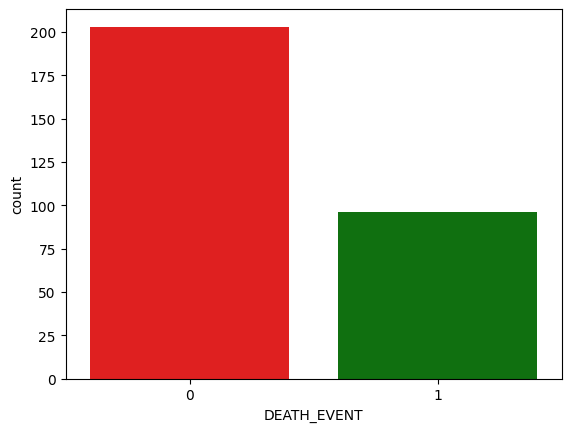

In [ ]:
# first of all let us evaluate the target and find out if the data is imbalanced or not
cols = ["red", "green"]
sns.countplot(x=data["DEATH_EVENT"] , palette = cols)

In [ ]:
#assigning values to features as X and target as y
X = data.drop(["DEATH_EVENT"], axis = 1)
y = data["DEATH_EVENT"]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
#Set up a standard scaler for the features
col_names = list(X. columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#spliting test and traning sets
X_train, X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.25,random_state = 7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
            min_delta = 0.001,
            patience = 30,
            restore_best_weights = True
)

#initializing model type
model = Sequential()
#layers
#input layer
model.add (Dense(units = 16, kernel_initializer= 'uniform' ,activation = 'relu',input_dim = 12))
#hidden layer 1
model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu'))
model.add (Dropout (0.25))
#hidden layer 2
model.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
model.add (Dropout (0.5))
#output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))


In [ ]:
# from tensorflow.keras.optimizers import SGD
# Compiling the ANN
#binary_crossentropy for our binary classification

model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs = 500, callbacks=[early_stopping],validation_split=0.2)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5632 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6922
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6381 - loss: 0.6922 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6491 - loss: 0.6913 - val_accuracy: 0.6667 - val_loss: 0.6904
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6521 - loss: 0.6904 - val_accuracy: 0.6667 - val_loss: 0.6895
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6596 - loss: 0.6895 - val_accuracy: 0.6667 - val_loss: 0.6885
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6426 - loss: 0.6890 - val_accuracy: 0.6667 - val_loss: 0.6876
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6692 - loss: 0.6872 - val_accuracy: 0.6667 - val_loss: 0.6866
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6392 - loss: 0.6875 - val_accuracy: 0.6667 - val_loss: 0.6

In [ ]:
val_accuracy = np.mean(history.history ['val_accuracy']) # mean value of all epochs accuracy
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy* 100))


val_accuracy: 66.67%


In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test) #predict with test data set
y_pred =(y_pred > 0.5)#make predicted value to e or 1:
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
y_test

,DEATH_EVENT
268,0
240,0
278,0
176,0
202,0
...,...
24,1
62,0
249,0
90,0


[[57  0]
 [18  0]]


<Axes: >

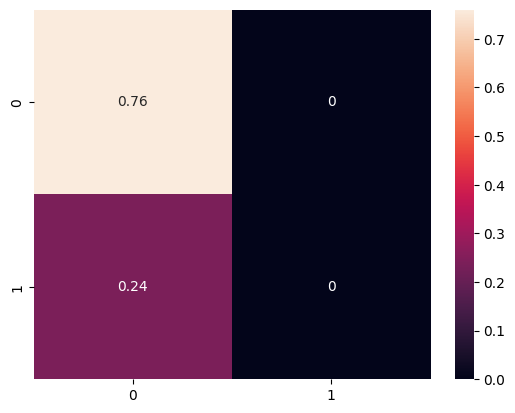

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)